In [1]:
import numpy as np 
import matplotlib.pyplot as plt

### __1. Mostly Zeros__

$A = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 
\end{bmatrix}$

---
#### __range(A)__
Range of $A \in \mathbb{R}^{4\times5}$ is the set of all points $\mathbf{v}\neq \mathbf{0} \in \mathbb{R}^4$ s.t. $A \mathbf{x} = \mathbf{v}$ 

Basis for range$(A)$ for any $\mathbf{x} \in \mathbb{R}^5$, 
$A\mathbf{x} = 
\begin{matrix}
\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} x_1 + & 
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} x_2 + &
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} x_3 + &
\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} x_4 + & 
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} x_5 
\end{matrix} $

By inspection, we can say that the basis of range$(A)$ or $\mathbf{v}$ is 
$\mathbf{b_1} = 
\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} $ 
$\, \mathbf{b_2} = 
\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} $ 

---
#### __null(A)__
null$(A)$ is the set of all points $\mathbf{x} \in \mathbb{R}^5$, s.t. $A \mathbf{x} = \mathbf{0}$. This means that any basis of Null$(A)$ is orthogonal to all rows of $A$ or some linear combination of its rows. Therefore, the basis for Null$(A)$ (from inspection of rows of A)

$\mathbf{b_1} = 
\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} $ 
$\, \mathbf{b_2} = 
\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} $
$\, \mathbf{b_3} = 
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} $
$\, \mathbf{b_4} = 
\begin{bmatrix} -1 \\ 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} $

---
#### __$Ax = b$ has no solutions__
For $b \not\in \text{range}(A)$, there is no $\mathbf{x}$ for which $A\mathbf{x} = b$ is satisfied. Therefore, $b$ can be 
$\begin{matrix}
\alpha \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}  + & 
\beta \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} 
\end{matrix} \, $ 

$\forall \alpha,\beta \in \mathbb{R} - \{0\}$

---
#### __$Ax = b$ has exactly one solution__
Since the set $P =  \text{null}(A) - \{\mathbf{0}\} $ contains infinitely many points, therefore it is __impossible__ to have exactly one solution as 

$A(\mathbf{x + x_n}) = b, \; \forall b \in \text{range}(A)$ we will always have many $x_n \in P$, s.t. $A\mathbf{x_n} = \mathbf{0} for any x that solves the linear system$

---
#### __$Ax = b$ has infinitely many solutions__
From the above argument, we can conclude that if there is a solution to $A\mathbf{x} = \mathbf{b}$, there will be infinitely many solutions because of the existence of non-zero set $P$.




---
### __2. Predicting tree age__

Tree diameter (inches) : $ x = [18.1,8.0,16.8,2.8,3.9,12.7,11.5,9.5,8.0,13.2]^T$ and 

Tree age (years) $ y = [83,42,79,16,24,73,60,44,47,67]^T$ 

We know that the linear least squares solution to the set of linear equations given by $A\mathbf{x}= \mathbf{b}$ where $A\in \mathbb{R}^{m \times n}, \mathbf{x} \in \mathbb{R}^n \text{and}\, \mathbf{b} \in \mathbb{R}^m $ is 

$
\begin{equation}
    \tag{0}
    x  = (A^TA)^{-1}A^Tb
\end{equation}
$

#### __a.) Age model $y = mx$__
The set of equations for the given data will be:

$\begin{align}
    \tag{1}
    mx_1 &= y_1 \\
    \vdots \\
    mx_{10} &= y_{10}
\end{align}$

In terms of the definition $A\mathbf{x} = b$ as a set of linear equations in $(1)$, we have here 

$\begin{align}
    \tag{2}
    A &= x \in \mathbb{R}^{10\times1}  \\
    \mathbf{x} &= m \in \mathbb{R} \\
    b &= y \in \mathbb{R}^{10\times1} 
\end{align}$

---

In [2]:
# Raw Data
circumference = np.array([[18.1,8.0,16.8,2.8,3.9,12.7,11.5,9.5,8.0,13.2]]).T #column vector
age = np.array([[83.0,42.0,79.0,16,24,73,60,44,47,67]]).T #column vector

#Sorted data
mat_append = np.concatenate([circumference,age],axis=1)
mat_append = mat_append[np.argsort(mat_append[:,0])] # sort by diameter
circumference = mat_append[:,0]
age = mat_append[:,1]

# make column vectors
circumference = circumference.reshape(circumference.shape[0],1) 
age = age.reshape(age.shape[0],1) 

print("circumference in inches")
print(circumference.T)
print("age in years")
print(age.T)

# least square solution function
def lst_sq_sol(A,b):
    x = np.linalg.inv(A.T @ A) @ A.T @ b
    return x

def lst_sq_error(y_predicted,y_measured):
    sq_sum_error = np.sum((y_predicted - y_measured)**2)
    return sq_sum_error

def predict_age(A,x):
    return A@x

circumference in inches
[[ 2.8  3.9  8.   8.   9.5 11.5 12.7 13.2 16.8 18.1]]
age in years
[[16. 24. 42. 47. 44. 60. 73. 67. 79. 83.]]


#### __Age model $y = mx$__
The set of equations for the given data will be:

$\begin{align}
    \tag{1}
    mx_1 &= y_1 \\
    \vdots \\
    mx_{10} &= y_{10}
\end{align}$

In terms of the definition $A\mathbf{x} = \mathbf{b}$ as a set of linear equations in $(1)$, we have here 

$\begin{align}
    \tag{2}
    A &= x \in \mathbb{R}^{10\times1}  \\
    \mathbf{x} &= m \in \mathbb{R} \\
    \mathbf{b} &= y \in \mathbb{R}^{10\times1} 
\end{align}$


In [3]:
A = circumference
b = age
print("---- Solution to the linear model y = mx ---")
x = lst_sq_sol(A,b) # parameter m
print("model parameters:")
print(x)
age_predicted = {}
age_predicted["model1"] = predict_age(A,x)
error = lst_sq_error(age_predicted["model1"],age)
print(" least squared error for the model: %f"%(error))

---- Solution to the linear model y = mx ---
model parameters:
[[5.0036014]]
 least squared error for the model: 268.232893


---

#### __b.) Age model $y = a_2x^2 + a_1 x + a_0$__
The set of equations for the given data:
will be:

$\begin{align}
    \tag{3}
    a_2 x_1^2  + a_1 x_1  + a_0  &= y_1 \\
    \vdots \\
    a_2 x_{10}^2  +  a_1 x_{10} + a_0 &= y_{10}
\end{align}$

In terms of the definition $A\mathbf{x} = b$ as a set of linear equations in $(3)$, we have here 

$\begin{align}
    \tag{4}
    A &= \begin{bmatrix} x_1^2 & x_1 & 1 \\ \vdots \\ x_{10}^2 & x_{10} & 1 \end{bmatrix} \in \mathbb{R}^{10\times3} \\
    \mathbf{x} &= [a_2,a_1,a_0]^T \in \mathbb{R}^{3\times1} \\
    \mathbf{b} &= y \in \mathbb{R}^{10\times1}
\end{align}$


In [4]:
A = np.concatenate((circumference**2,
                    circumference,
                    np.ones(circumference.shape)),
                   axis=1)
b = age
print("---- Solution to the quadratic model y = a_2x^2 + a_1x + a_0 ---")
x = lst_sq_sol(A,b) # parameter a2,a1,a0
print("model parameters:")
print(x)

age_predicted["model2"] = predict_age(A,x)
error = lst_sq_error(age_predicted["model2"],age)
print("Least square error for model 2: %f"%(error))

---- Solution to the quadratic model y = a_2x^2 + a_1x + a_0 ---
model parameters:
[[-0.09712011]
 [ 6.46569415]
 [-1.25704147]]
Least square error for model 2: 132.592597


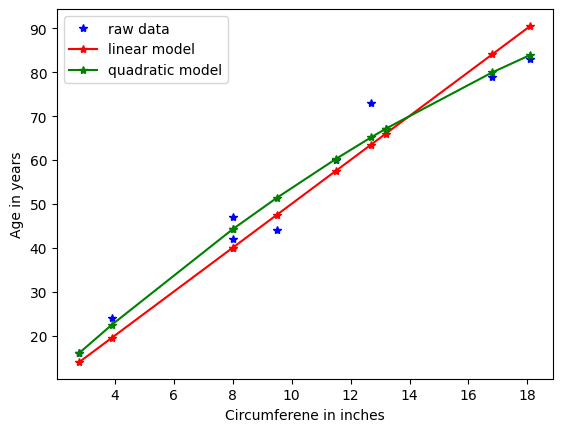

In [5]:
plt.plot(circumference, age, 'b*',label="raw data")
plt.plot(circumference, age_predicted["model1"], '-r*',label="linear model")
plt.plot(circumference, age_predicted["model2"], '-g*', label="quadratic model")
plt.xlabel("Circumferene in inches")
plt.ylabel("Age in years")
plt.legend()
plt.show()

#### __d) Suppose $x_i = 10 \, \forall i$ and the model is $y = mx + c$__


$\begin{align}
A &= \begin{bmatrix} 10 & 1  \\ \vdots \\ 10 & 1 \end{bmatrix} \in \mathbb{R}^{10\times2} \\
\mathbf{x} &= [m,c]^T \in \mathbb{R}^{2\times1} \\
\mathbf{b} &= y \in \mathbb{R}^{10\times1}
\tag{}
\end{align}$
In this case the matrix $A$ loses rank, as both the columns are same and all rows are same as well. The null($A$) is $Ax = 0$ gives 
 $c + 10m = 0 \tag{}$ The equation of the line is a combination of null solution and the range (A). The lines satisfying this condition passes through the point $(10,k)$ shown below as red point. Here, The lines passing through points $(10,0)$ are shown. 

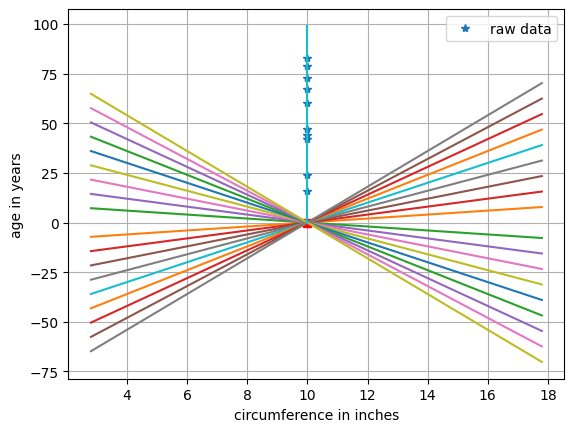

In [6]:
circumference_1 = 10*np.ones([10,1]) #column vector
coord_x = np.arange(np.min(circumference),np.max(circumference))
age = np.array([[83.0,42.0,79.0,16,24,73,60,44,47,67]]).T #column vector
plt.plot(circumference_1,age,"*",label="raw data")
plt.plot(10,0,"rs")
for i in range(1,10):
    plt.plot(coord_x,i*coord_x - i*10)
    plt.plot(coord_x,-i*coord_x + i*10)
plt.plot(10*np.ones([100,1]),np.arange(0,100))
plt.xlabel("circumference in inches")
plt.ylabel("age in years")
plt.legend()
plt.grid()
plt.show()

### __3. Perp properties__
__a.) To prove $S^\bot$ is a subspace, we need to prove the following:__

1. __Existence of zero element in $S^\bot$:__

    For any element $a\neq{0} \in S \subseteq\mathbb{R}^n$ and by definition of $S^{\bot}$, we know that any element $b \in S^\bot,\, a^Tb = 0$ 
    This is also true for $b = \mathbf{0}$. Therefore, $\mathbf{0}$ belongs to $S^\bot$

2. __Existence of inverse element in $S^\bot$:__

    For any element $a\neq{0} \in S \subseteq\mathbb{R}^n$ and by definition of $S^{\bot}$, we know that any element $b \in S^\bot,\, a^Tb = 0$ 
    This is also true for $b_1 = -b$. Therefore, $b_1$ belongs to $S^\bot$

3. __Existence of the element multiplied with a scalar in the vector space:__

    If $ b \in S^\bot$, then $\lambda b \in S^\bot$ For any element $b \in S^\bot$, we have $a^Tb = 0 \forall a$. Therefore, $a^T(\lambda b) = \lambda a^Tb = 0 $ as well. 
$\implies \lambda b \in S^\bot$

4. __Existence of addition of two elements in the vector space:__

   If $ b_1,b_2 \in S^\bot$, For $ b_1 + b_2 \in S^\bot$ , the condition $(a^T(b_1 + b_2) = a^Tb_1 + a^Tb_2 = 0$ is true (since inner products are distributive over addition) $\implies b_1 + b_2 \in S^\bot$

__b.) To prove $S \subseteq (S^\bot)^\bot$__

__Case 1:__ $S$ is a subspace. $\mathbf{0} \in S$ and let $a \in S$ and $b \in S^\bot$. Then, $a^Tb = 0 \implies b^Ta = 0 \implies a\in (S^\bot)^\bot$
So $S = S^{\bot \bot}$

__Case 2:__ $S$ is not a subspace. $\mathbf{0} \not\in S$ and let $a\neq{0} \in S$ and $b \in S^\bot$. Then, $a^Tb = 0 \implies b^Ta = 0 \implies a\in (S^\bot)^\bot. S^{\bot \bot}$ is a vector space with element $\mathbf{0}$
So $S = S^{\bot \bot} - \{0\} \subset S^{\bot \bot} $ 

A similar argument can be made for other elements in set $S$ when it is not a subspace. For instance, $a \in S, \lambda a \not\in S$, we can easily show by above procedure that $\lambda a \in S^{\bot \bot} \text{but} \not\in S$. A similar argument for sum of two vectors $a_1 + a_2 \not\in S$ can be made.

Therefore, $S \subseteq S^{\bot\bot}$


### __3. Sums and intersections__
Given $S$ and $T$ are subspaces, 

__a.) To prove $S \cap T$ and $S + T$ is a subspace, we need to prove the following:__
1. __Existence of zero element in $S \cap T$ and $S + T$:__
 
    $a = \mathbf{0} \in S, \, b = \mathbf{0} \in T$ and by definition of $S\cap T$ and $S+T$ we know that any element $\mathbf{0} \in S\cap T, \, S+T $ 
       
2. __Existence of the element multiplied with a scalar in the vector space:__

    For any element $a \in S \cap T \implies a\in S \text{ and } T$ and by definition of $S$ and $T$, $\lambda a \in S \text{ and } T \implies \lambda a \in S \cap T$
    
    For any element $a \in S, b \in T \implies c = (a + b) \in S + T$ and by definition of $S$ and $T$, $\lambda a \in S , \text{ and } \lambda b \in T \implies \lambda a+ \lambda     b = \lambda(a+b) = \lambda c \in S + T$

3. __Existence of addition of two elements in the vector space:__

    For any element $a_1,a_2 \in S \cap T, a_1,a_2 \in S \text{ and } T$ both $\implies (a_1+a_2) \in S \text{ and } T$ both $\implies (a_1+a_2) \in S \cap T$

__b) To prove $(S+T)^\bot = S^\bot \cap T^\bot:$__

For any element $ a \in S, b \in T \implies c = (a + b) \in S + T \implies$ when $c^Tx = a^Tx + b^Tx = 0, x \in (S+T)^\bot$. For some $ x, a^Tx = 0, b^Tx = 0$ will vanish individually, there is a subset of elements $x$ which are part of $S^\bot \cap T^\bot$ $\therefore (S+T)^\bot \subseteq S^\bot \cap T^\bot$

Conversely, when $a^Tx_1 = 0, x_1 \in S^\bot$ and $b^Tx_2 = 0, x_2 \in T^\bot \implies$ When $ S^\bot \cap T^\bot$, then $x_2 = x_3 = x_1, a^Tx_1 + b^Tx_1 = 0$ will be zero. But this is the condition for $x_1 \in (S+T)^\bot \implies S^\bot \cap T^\bot \subseteq (S+T)^\bot$.

$\implies (S+T)^\bot = S^\bot \cap T^\bot $



c) __To prove $(S \cap T)^\bot = S^\bot + T^\bot:$__

For any element $ a \in S\cap T, \implies a \in S, T \implies$ when $a^Tx = 0, x \in (S\cap T)^\bot , $

For any  $a \in S,T, s_1 \in S^\bot,\, t_1 \in T^\bot \implies s_1^Ta = 0, t_1^Ta = 0 $

By definition, $(s_1+t_1) \in (S^\bot + T^\bot)$

$\implies a^T(s_1 + t_1) = 0 \therefore (s_1+t_1) \in (S \cap T)^\bot \implies S^\bot + T^\bot \subseteq (S \cap T)^\bot $

It also means, when 

$a \in S^\bot \implies a^Tx_1 = 0 \forall x_1 \in S$ and 

$b \in T^\bot \implies b^Tx_2 = 0 \forall x_2 \in T$.

An element in $ S^\bot + T^\bot$ is $a+b \implies a^Tx_1 + b^Tx_2 = 0\forall x_1,x_2$   
For $S\cap T, x_1 = x_2 = x, \therefore a^Tx + b^Tx = 0 \implies x \in (S\cap T)^\bot \implies (S\cap T)^\bot \subseteq S^\bot + T^\bot$ 

$\implies (S\cap T)^\bot = S^\bot + T^\bot $


---
### 3) Hovercraft rendezvous
$x_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \; x_{20} = \begin{bmatrix} 4 \\ 3 \end{bmatrix}\; x_{35} = \begin{bmatrix} 7 \\ 0 \end{bmatrix} \;x_{60} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

We have the hovercraft dynmamics as 

$\begin{align}
    x_{t+1} &= x_t + v_t\\
    v_{t+1} &= v_t + u_t
    \tag{1}
\end{align}
$

$\begin{align}
    v_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix} & x_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \\
    x_1 &= x_0 + v_0 \\
    v_1 &= v_0 + u_0\\
    \\
    x_2 &= x_1 + v_1 = x_0 + v_0 + v_0 + u_0 = x_0 + u_0\\
    v_2 &= v_1 + u_1 = v_0 + u_0 + u_1 = u_0 + u_1\\
    \\
    x_3 &= x_2 + v_2 = x_0 + 2u_0 + u_1\\
    v_3 &= v_2 + u_2 = u_0 + u_1 + u_2\\
    \vdots\\
    x_n &= x_0 + (n-1)u_0 + (n-2)u_1+ \ldots + (n-m-1)u_m+\ldots u_{n-1}\\
    v_n &= \Sigma_{i=0}^{n-1} u_i \\
    \tag{2}
\end{align}
$

---
$\begin{align}
\tag{3}
x_1 &= x_0 \\
x_{20} &= x_0 + 19 u_0 + 18 u_1+ \ldots + u_{19} \\
x_{35} &= x_0 + 34 u_0 + 33 u_1+ \ldots + 15 u_{19} + \ldots + u_{34} \\
x_{60} &= x_0 + 59 u_0 + 58 u_1+ \ldots + 40 u_{19} + \ldots + 25 u_{34} + \ldots + u_{59}\\
\end{align}$

Each element $u_i = [u_i^x u_i^y] ^T$, therefore the system of equations convert to $Au = x_{del}$ where $u\in \mathbb{R}^{60}$

$
A_{3\times60} =
\begin{bmatrix}
  19 & 18 & \ldots & 1 &  0 &  \ldots & 0 & 0 & \ldots & 0 \\
  34 & 33 & \ldots & 15 & 14 & \ldots & 1 & 0 & \ldots & 0 \\
  59 & 58 & \ldots & 40 & 39 & \ldots & 25 & 24 & \ldots & 1 \\
\end{bmatrix}\, 
x_{del} = 
\begin{bmatrix}
    3 & 2 \\ 6 & -1 \\ 0 & 0 
\end{bmatrix}
\tag{4}
$

In [7]:
def minimum_norm_sol(A,b):
    x = A.T@np.linalg.inv(A@A.T)@b
    return x

[[19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [34. 33. 32. 31. 30. 29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17.
  16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47. 46. 45. 44. 43. 42.
  41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29. 28. 27. 26. 25. 24.
  23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.
   5.  4.  3.  2.  1.]]
<class 'numpy.ndarray'>
minimum norm solution
(59, 2)


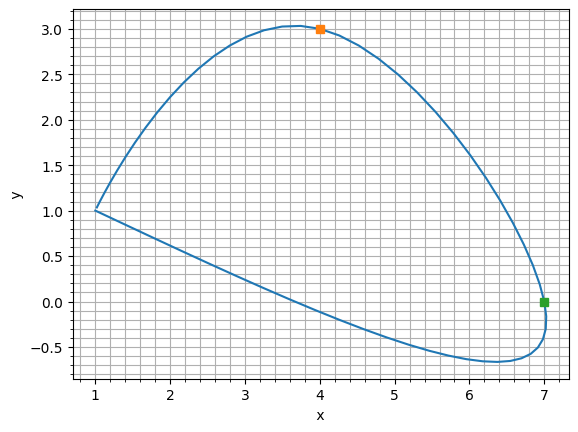

In [8]:
A = np.zeros([3,59])
A[0,0:19] = np.arange(19,0,-1)
A[1,0:34] = np.arange(34,0,-1)
A[2,0:59] = np.arange(59,0,-1)
x_del = np.array([[3,6,0],
                  [2,-1,0]]).T

# print("A matrix:")
print(A)

# print("x del matrix")
# print(x_del)

u = np.zeros([59,2])
u = minimum_norm_sol(A,x_del)
print(type(u))

#u[:,1] = minimum_norm_sol(A,x_del_
print("minimum norm solution")
#print(u)
print(u.shape)
v = np.zeros(u.shape)
x = np.zeros(u.shape)
for i,p in enumerate(u):
    row = np.zeros([1,59])
    row[0,0:i+1] = np.arange(i+1,0,-1)
    #print(row[0,:].shape)
    #print(u[:,0].shape)
    x[i,0] = 1 + row[0,:]@u[:,0]
    x[i,1] = 1 + row[0,:]@u[:,1]
plt.plot(x[:,0],x[:,1])
plt.plot(4,3,'s')
plt.plot(7,0,'s')
plt.grid(which="major")
plt.grid(which="minor")
plt.minorticks_on()
plt.xlabel(" x ")
plt.ylabel(" y ")
plt.show()

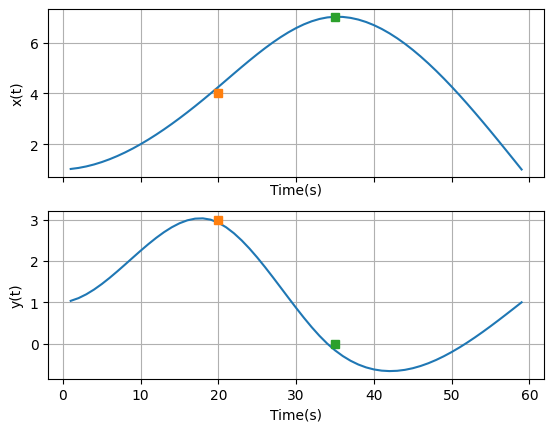

In [21]:
f, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(np.arange(1,60,1),x[:,0])
ax[0].plot(20,4,"s")
ax[0].plot(35,7,"s")
ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel("x(t)")
ax[0].grid()

ax[1].plot(np.arange(1,60,1),x[:,1])
ax[1].plot(20,3,"s")
ax[1].plot(35,0,"s")
ax[1].set_xlabel("Time(s)")
ax[1].set_ylabel("y(t)")
ax[1].grid()

plt.show()

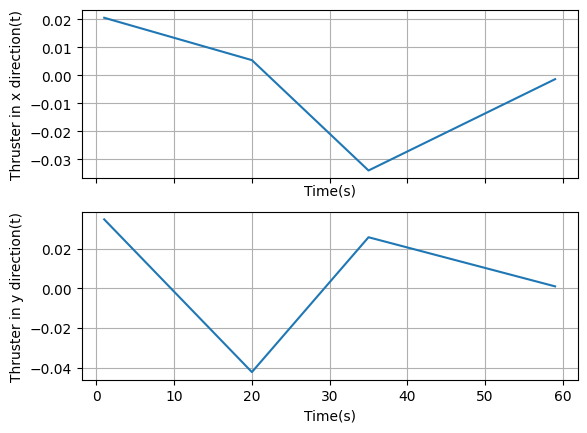

In [25]:
f, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(np.arange(1,60,1),u[:,0])

ax[0].set_xlabel("Time(s)")
ax[0].set_ylabel("Thruster in x direction(t)")
ax[0].grid()

ax[1].plot(np.arange(1,60,1),u[:,1])

ax[1].set_xlabel("Time(s)")
ax[1].set_ylabel("Thruster in y direction(t)")
ax[1].grid()

plt.show()

---

### 6.) Smoothing via regularization:

---
#### __Regularizing via first derivative converted to the $min_x ||Ax - b||^2$ form__
$y_{est} = arg min_{y\in\mathbb{R}^{500}} || y - y_{meas} ||^2 + \lambda \sum_{t=2}^{500} (y_t - y_{t-1})^2 \tag{5}$

$y_{est} = arg min_{y\in\mathbb{R}^{500}} || \begin{bmatrix} I_{500 \times 500}\\ \sqrt\lambda M_{499 \times 500} \end{bmatrix}\mathbf{y} - \begin{bmatrix} y_{meas} \\ \mathbf{0}_{499 \times 1} \end{bmatrix}||^2  \tag{6}$

$M_{499 \times 500} = 
    \begin{bmatrix}
        -1 &  1 & 0 & 0 & \ldots & 0 & 0 \\
         0 & -1 & 1 & 0 & \ldots & 0 & 0 \\
         \cdots\\
         0 & 0 & 0 & 0 & \ldots & -1 & 1 \\
         \tag{7}
    \end{bmatrix}
$

#### __Regularizing via second derivative converted to the $min_x ||Ax - b||^2$ form__
$y_{est} = arg min_{y\in\mathbb{R}^{500}} || y - y_{meas} ||^2 + \lambda \sum_{t=2}^{499} (y_{t+1} - 2y_{t} + y_{t-1})^2 \tag{8}$

$y_{est} = arg min_{y\in\mathbb{R}^{500}} || \begin{bmatrix} I_{500 \times 500}\\ \sqrt\lambda T_{498 \times 500} \end{bmatrix}\mathbf{y} - \begin{bmatrix} y_{meas} \\ \mathbf{0}_{498 \times 1} \end{bmatrix}||^2  \tag{9}$

$T_{498 \times 500} = 
    \begin{bmatrix}
         1 & -2 &  1 & 0 & \ldots & 0 & 0 & 0 \\
         0 &  1 & -2 & 1 & \ldots & 0 & 0 & 0 \\
         \cdots\\
         0 & 0 & 0 & 0 & \ldots   & 1 & -2 & 1 \\
         \tag{10}
    \end{bmatrix}
$


